In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def plot_cost_function(method_names, cost_lists, time_lists):
    data = []

    assert len(method_names) == len(cost_lists) == len(time_lists)
    for method, costs, times in zip(method_names, cost_lists, time_lists):
        assert len(costs) == len(times)
        for iteration, (cost, time) in enumerate(zip(costs, times), start=1):
            data.append([method, iteration, cost, time])
    df = pd.DataFrame(data, columns=["Method", "Iteration", "Cost", "Time"])

    plt.figure(figsize=(10, 6))
    sns.set_theme(style="darkgrid")
    minData = np.inf
    for method in method_names:
        marker = "o" if "BFGS" in method else "X"
        subset = df[df["Method"] == method]
        sns.lineplot(
            # x="Iteration",
            x="Time",
            y="Cost",
            data=subset,
            marker=marker,
            label=method,
            markersize=8,
            color="tab:blue" if "RS" in method else "tab:orange",
        )
        minData = min(minData, subset["Cost"].min())

    # plt.xlabel("Iteration", fontsize=12)
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Stress", fontsize=12)
    plt.ylim(minData - 50, minData + 1000)
    plt.title("Cost Function per Iteration", fontsize=14)
    plt.legend(title="Method", fontsize=10)
    plt.tight_layout()
    plt.show()

In [25]:
def parse_hist_file(file_path):
    data = {}
    with open(file_path, "r") as file:
        num_matrices, num_methods = map(int, file.readline().strip().split())

        for _ in range(num_matrices):
            matrix_name = file.readline().strip()
            data[matrix_name] = {}

            for _ in range(num_methods):
                method_name = file.readline().strip()
                data[matrix_name][method_name] = {}
                _hist_size = int(file.readline().strip())
                hist = list(map(float, file.readline().strip().split()))
                data[matrix_name][method_name]["history"] = hist
                time = list(map(float, file.readline().strip().split()))
                data[matrix_name][method_name]["time"] = time
                time_line = file.readline().strip()
                avg_time = float(time_line.split(": ")[1])
                data[matrix_name][method_name]["elapsed_time"] = avg_time
                score_line = file.readline().strip()
                avg_score = float(score_line.split(": ")[1])
                data[matrix_name][method_name]["score"] = avg_score

    return data

In [26]:
file_path = "../../out/_hist.txt"
parsed_data = parse_hist_file(file_path)
print(parsed_data.keys())

dict_keys(['dwt_1005'])


dwt_1005


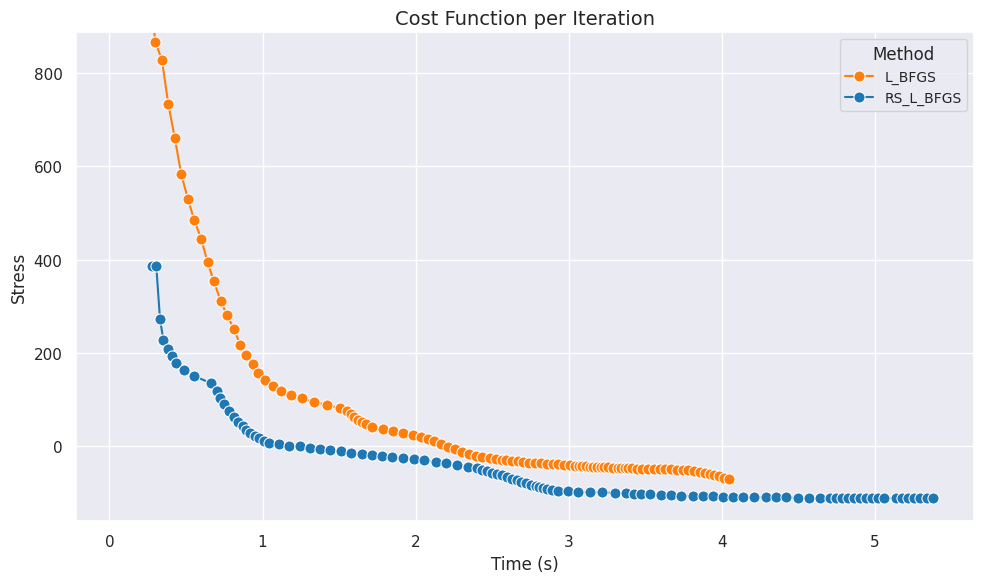

In [27]:
for matrixName in parsed_data:
    print(matrixName)
    methods = parsed_data[matrixName].keys()
    costs = [parsed_data[matrixName][method]["history"] for method in methods]
    times = [parsed_data[matrixName][method]["time"] for method in methods]
    plot_cost_function(methods, costs, times)